In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import contextily as ctx
import re

In [2]:
cvhm = pd.read_csv("cvhm_PC.csv")

In [3]:
SGMA = "../../data/GWBasins.shp"
gdf = gpd.read_file(SGMA)
gdf.set_crs(epsg=3857, inplace=True)
gdf.set_index('OBJECTID', inplace=True)
gdf['Basin_Prefix'] = gdf['Basin_Numb'].str.split('-').str[0].astype(int)
gdf = gdf[gdf.Basin_Numb == "5-021"]

In [4]:
cvhm_gdf = gpd.GeoDataFrame(cvhm, geometry=gpd.points_from_xy(cvhm.X_COORD, cvhm.Y_COORD))

crs_albers = {
    'proj': 'aea',           # Albers Equal Area Conic projection
    'lat_1': 29.5,           # First standard parallel
    'lat_2': 45.5,           # Second standard parallel
    'lat_0': 23.0,           # Latitude of origin
    'lon_0': -120.0,         # Central meridian
    'x_0': 0,                # False easting
    'y_0': 0,                # False northing
    'datum': 'NAD83',        # Datum
    'units': 'm'             # Linear unit in meters
}

cvhm = cvhm_gdf.set_crs(crs_albers)

In [5]:
cvhm = cvhm.to_crs(gdf.crs)
cvhm_5021 = gpd.clip(cvhm, gdf)

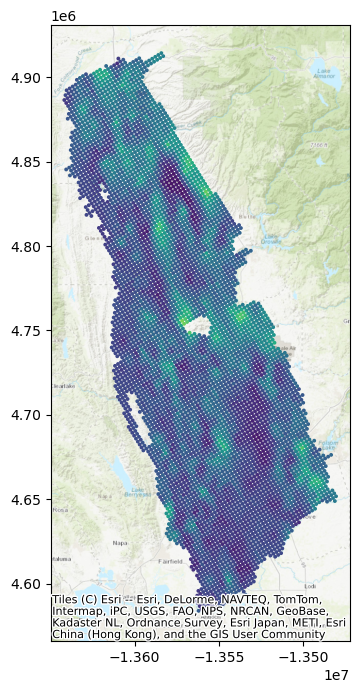

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
cvhm_5021.plot("PC_D325", vmin=0, vmax=100, markersize=3, ax=ax)
ctx.add_basemap(
    ax,
    source=ctx.providers.Esri.WorldTopoMap,
    crs=cvhm_5021.crs
)
plt.show()

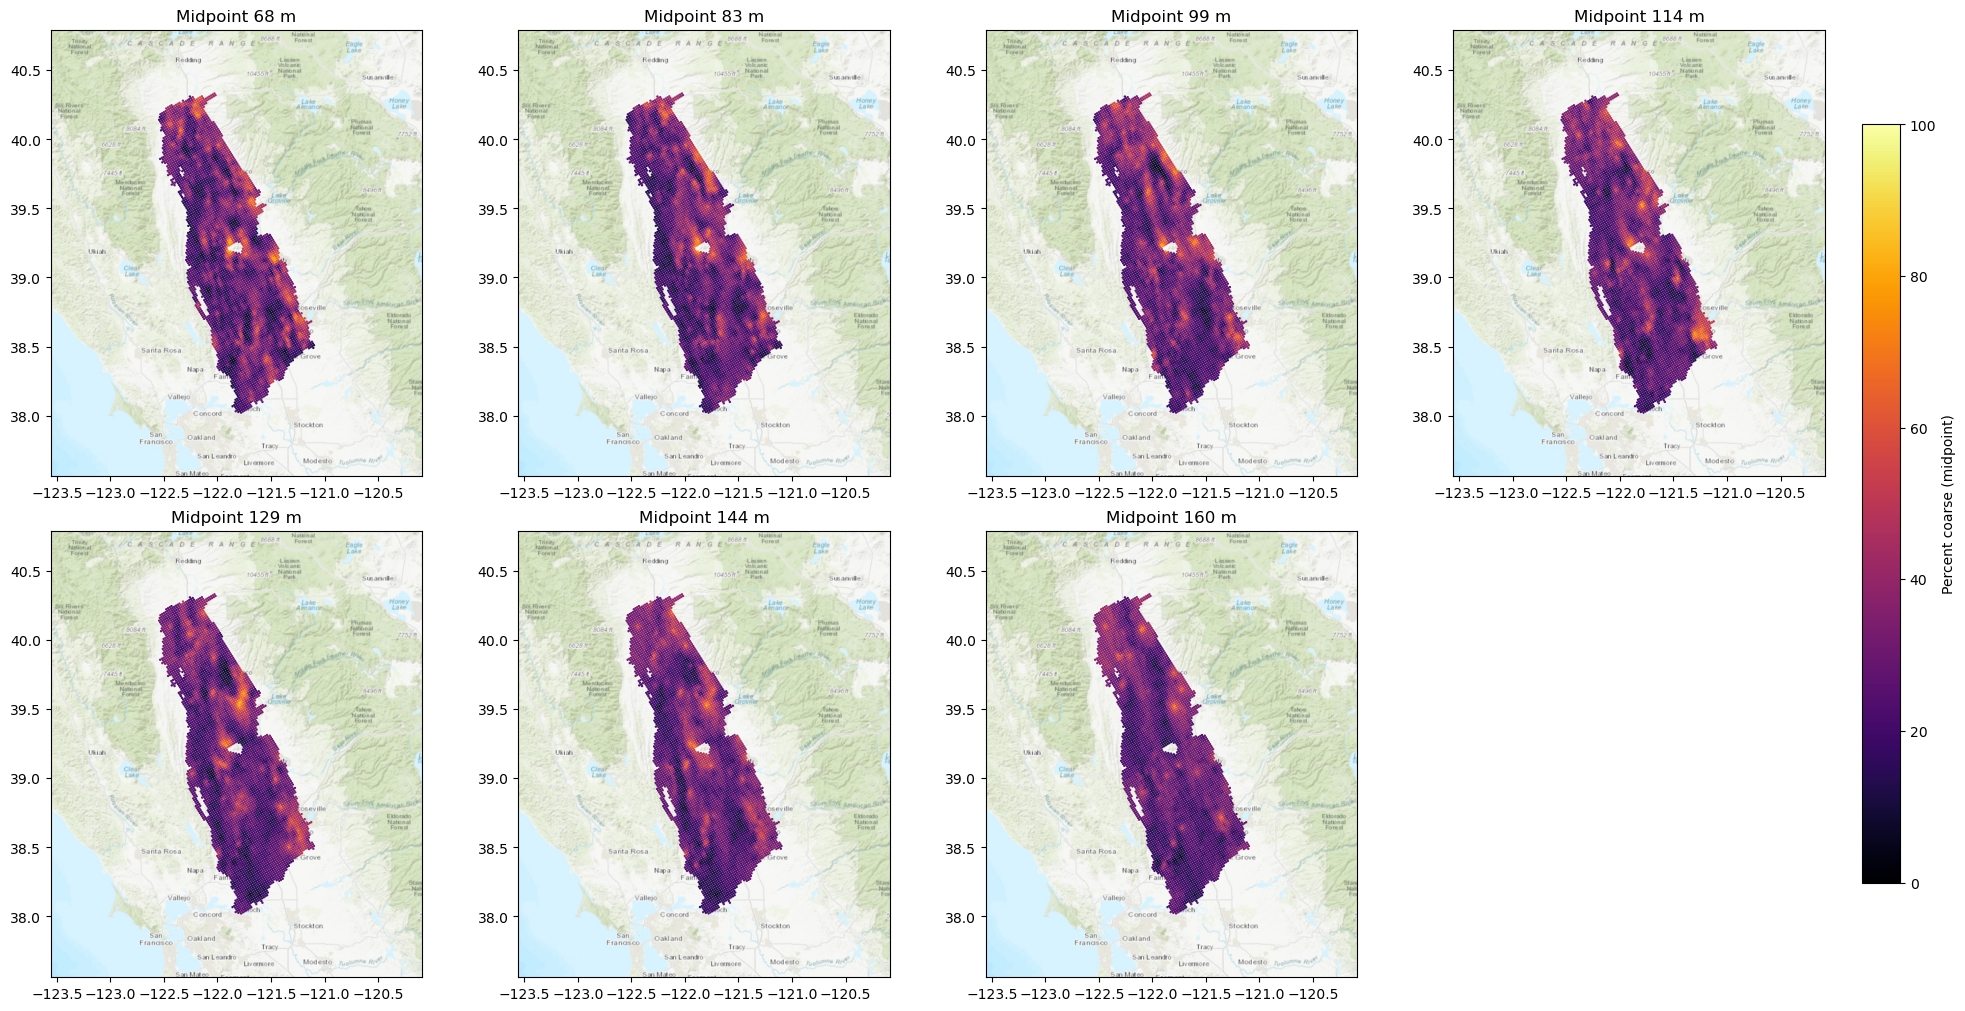

In [8]:
cols = [
    "PC_D225",
    "PC_D275",
    "PC_D325",
    "PC_D375",
    "PC_D425",
    "PC_D475",
    "PC_D525",
]

cvhm_4326 = cvhm_5021.to_crs(epsg=4326)

n = len(cols)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(
    nrows=nrows, ncols=ncols,
    figsize=(ncols*5, nrows*5),
    constrained_layout=True
)
axes = axes.flatten()

for idx, (ax, col) in enumerate(zip(axes, cols)):
    xmin, ymin, xmax, ymax = cvhm_4326.total_bounds
    x_buffer = (xmax - xmin) * 0.7
    y_buffer = (ymax - ymin) * 0.2
    ax.set_xlim(xmin - x_buffer, xmax + x_buffer)
    ax.set_ylim(ymin - y_buffer, ymax + y_buffer)

    plot_kw = {
        "column": col,
        "cmap": "inferno",
        "markersize": 0.5,
        "vmin": 0,
        "vmax": 100,
        "legend": False
    }

    cvhm_4326.plot(ax=ax, **plot_kw)
    ctx.add_basemap(
        ax,
        source=ctx.providers.Esri.WorldTopoMap,
        crs=cvhm_4326.crs,
        attribution=False
    )

    mid_ft = int(col.split("_")[-1][-3:])
    ax.set_title(f"Midpoint {mid_ft//3.281:.0f} m")

for ax in axes[n:]:
    ax.set_visible(False)

cax = fig.colorbar(
    plt.cm.ScalarMappable(cmap="inferno", norm=plt.Normalize(0, 100)),
    ax=axes.tolist(), orientation="vertical", fraction=0.05, pad=0.02, shrink=0.8
)
cax.set_label("Percent coarse (midpoint)")

plt.show()

In [9]:
cvhm2 = pd.read_csv("cvhm2.csv")

In [10]:
cvhm2

,Easting,Northing,Z,PC,Zone
0,-201744.6498,1956365.44,-7.62,38.997,10.0
1,-201744.6498,1956365.44,-22.86,52.280,10.0
2,-201744.6498,1956365.44,-38.10,64.783,10.0
3,-201744.6498,1956365.44,-53.34,71.800,10.0
4,-201744.6498,1956365.44,-68.58,60.824,10.0
...,...,...,...,...,...
965045,108530.0581,1326711.82,-693.42,49.845,50.0
965046,108530.0581,1326711.82,-708.66,43.110,50.0
965047,108530.0581,1326711.82,-723.90,42.370,50.0
965048,108530.0581,1326711.82,-739.14,44.458,50.0


In [12]:
cvhm2_gdf = gpd.GeoDataFrame(cvhm2, geometry=gpd.points_from_xy(cvhm2.Easting, cvhm2.Northing))
cvhm2 = cvhm2_gdf.set_crs(crs_albers)

In [15]:
cvhm2 = cvhm2.to_crs(gdf.crs)
cvhm2_5021 = gpd.clip(cvhm2, gdf)

In [18]:
cvhm2_5021

,Easting,Northing,Z,PC,Zone,geometry
331584,-153323.6560,1667493.027,-525.78,19.375,40.0,POINT (-13554652.282 4583517.327)
331583,-153323.6560,1667493.027,-510.54,19.967,40.0,POINT (-13554652.282 4583517.327)
331582,-153323.6560,1667493.027,-495.30,26.816,40.0,POINT (-13554652.282 4583517.327)
331581,-153323.6560,1667493.027,-480.06,38.992,40.0,POINT (-13554652.282 4583517.327)
331579,-153323.6560,1667493.027,-449.58,36.708,40.0,POINT (-13554652.282 4583517.327)
...,...,...,...,...,...,...
33313,-173608.2000,1924367.154,-205.74,39.809,12.0,POINT (-13587748.035 4912104.007)
33398,-172220.6997,1925182.498,-739.14,22.782,12.0,POINT (-13585938.31 4913205.453)
33399,-172220.6997,1925182.498,-754.38,15.016,12.0,POINT (-13585938.31 4913205.453)
33376,-172220.6997,1925182.498,-403.86,33.014,12.0,POINT (-13585938.31 4913205.453)


In [22]:
cvhm2_5021.drop(columns=["Zone", "geometry"]).pivot(
    index=["Easting", "Northing"],
    columns="Z",
    values="PC"
)

,Z,-754.38,-739.14,-723.90,-708.66,-693.42,-678.18,-662.94,-647.70,-632.46,-617.22,...,-144.78,-129.54,-114.30,-99.06,-83.82,-68.58,-53.34,-38.10,-22.86,-7.62
Easting,Northing,,,,,,,,,,,,,,,,,,,,,
-213759.92710,1910105.707,17.184,22.248,22.325,31.818,32.570,35.053,38.880,49.158,48.798,49.739,...,35.171,36.214,25.575,41.732,40.356,46.388,43.361,27.860,21.512,25.221
-213273.55090,1902925.018,15.633,19.342,22.005,26.977,33.574,31.094,33.875,46.287,48.945,48.872,...,38.058,39.014,33.324,42.612,44.419,53.184,49.811,38.538,35.445,37.696
-212944.58290,1908718.207,15.542,22.162,22.048,28.140,31.412,33.279,38.268,49.368,48.884,48.853,...,36.016,28.997,26.855,42.711,38.045,52.383,44.383,35.700,22.368,30.199
-212715.54640,1873386.916,11.646,9.216,9.322,13.043,16.515,23.807,30.534,34.954,29.354,37.802,...,60.179,55.076,53.701,52.679,40.964,40.493,41.984,39.922,35.646,18.772
-212701.39480,1905127.862,15.632,19.148,22.068,27.715,33.447,31.450,38.090,47.586,48.873,48.872,...,38.203,28.115,33.991,41.419,42.975,49.840,53.576,40.322,32.503,35.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-97895.27456,1722464.206,26.514,22.792,8.209,6.292,6.215,16.797,22.747,16.251,24.804,41.333,...,29.977,35.613,42.931,26.466,26.694,28.960,48.872,34.101,38.418,50.551
-97652.08647,1718873.861,31.820,22.938,23.506,19.041,28.543,35.659,34.020,37.103,48.455,58.372,...,24.242,37.648,38.312,26.981,29.477,23.692,36.155,33.711,39.648,40.582
-97079.93040,1721076.706,26.253,25.721,11.951,9.675,12.157,22.486,29.302,21.873,31.920,49.122,...,27.022,36.086,42.775,25.724,23.600,23.526,41.998,36.809,37.473,44.348


In [30]:
wide = (
    cvhm2_5021
    .drop(columns=["Zone", "geometry"])
    .pivot(index=["Easting", "Northing"],
           columns="Z",
           values="PC")
)

wide = wide.iloc[:, ::-1]
geom = (
    cvhm2_5021
    .drop_duplicates(subset=["Easting", "Northing"])
    .set_index(["Easting", "Northing"])["geometry"]
)

wide = (
    wide
    .join(geom)
    .reset_index()
)
wide_gdf = gpd.GeoDataFrame(wide,
                            geometry="geometry",
                            crs=cvhm2_5021.crs)
z_cols = [c for c in wide_gdf.columns 
          if isinstance(c, (int, float))]

rename_map = {c: f"Z_{int(c)}" for c in z_cols}
wide_gdf = wide_gdf.rename(columns=rename_map)

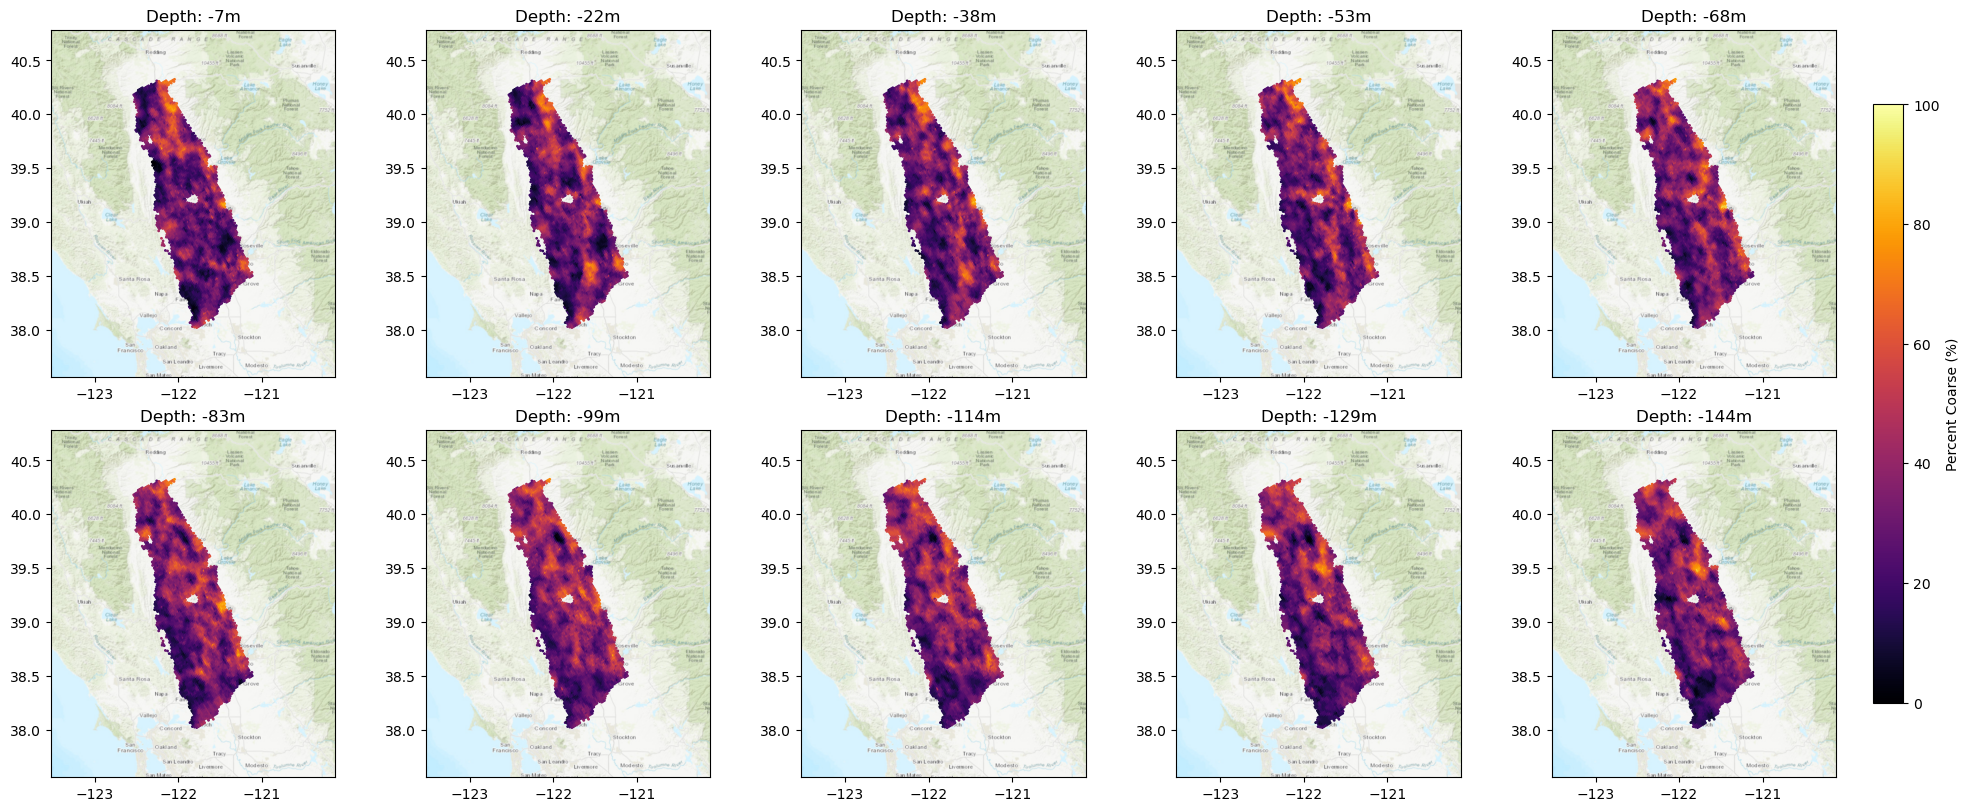

In [63]:
z_cols = [col for col in wide_gdf.columns if col.split("_")[0] == "Z"]
z_cols = [col for col in z_cols if int(col.split("_")[1]) > -150]

n = len(z_cols)
ncols = 5
nrows = n // ncols + (n % ncols > 0)

fig, axes = plt.subplots(nrows, ncols,
                         figsize=(ncols * 4, nrows * 4),
                         constrained_layout=True)

axes = axes.flatten()

for ax, col in zip(axes, z_cols):
    wide_gdf.to_crs(epsg=4326).plot(
        column=col,
        ax=ax,
        markersize=1,
        vmin=0,
        vmax=100,
        legend=False,
        cmap="inferno"
    )
    xmin, ymin, xmax, ymax = wide_gdf.to_crs(epsg=4326).total_bounds
    x_buffer = (xmax - xmin) * 0.7
    y_buffer = (ymax - ymin) * 0.2
    ax.set_xlim(xmin - x_buffer, xmax + x_buffer)
    ax.set_ylim(ymin - y_buffer, ymax + y_buffer)
    ax.set_title(f"Depth: {int(col.split('_')[1])}m")
    ctx.add_basemap(
        ax,
        source=ctx.providers.Esri.WorldTopoMap,
        crs="epsg:4326",
        attribution=False
    )

for ax in axes[len(z_cols):]:
    ax.set_visible(False)

cax = fig.colorbar(
    plt.cm.ScalarMappable(cmap="inferno", norm=plt.Normalize(0, 100)),
    ax=axes.tolist(), orientation="vertical", fraction=0.05, pad=0.02, shrink=0.8
)
cax.set_label("Percent Coarse (%)")

plt.show()

In [53]:
z_cols

['Z_-7',
 'Z_-22',
 'Z_-38',
 'Z_-53',
 'Z_-68',
 'Z_-83',
 'Z_-99',
 'Z_-114',
 'Z_-129',
 'Z_-144']